In [12]:
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from pprint import pprint
import openweathermapy.core as owm
from citipy import citipy
import random as random

In [13]:
# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
api_key

'6f4ceb243793f6a90aeed94e4f17b8a4'

## Generate Cities list

In [14]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500) 
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500) 
#zip in to a list of tuples
lat_lngs = zip(lats, lngs)
city_lat=[]
#to print zipped object
#for i in lat_lngs:
#    print(i)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        city_lat.append(lat_lng[0])

# Print the city count to confirm sufficient count
print(f"length of cities is {len(cities)}")
print(f"length of city_lat is {len(city_lat)}")



length of cities is 634
length of city_lat is 634


## Perform API Calls

In [16]:
#save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" #use imperial to get farenheit

#build partial string query URL
query_url = f"{url}appid={api_key}&units={units}&q="

#initialize lists to hold temperature, humidity clouds, wind, valid cities, invalid cities and valid latitudes
temp = []
humidity= []
clouds = []
wind = []
city_not_found=[]
valid_cities=[]
valid_lat=[]

with open("log.txt","w")as text:
    for i in range(len(cities)):
        response = requests.get(query_url+cities[i]).json()
    
        if response["cod"] == "404":
            print(f"city number {i}, {cities[i]} is not found", file=text)
            print(f"city number {i}, {cities[i]} is not found")
            city_not_found.append(cities[i])
        else:
            print(f"Getting data for city number {i}, {cities[i]}", file=text)
            print(f"Getting data for city number {i}, {cities[i]}")
            valid_cities.append(cities[i])
            valid_lat.append(city_lat[i])
            temp.append(response["main"]["temp"])
            humidity.append(response["main"]["humidity"])
            clouds.append(response["clouds"]["all"])
            wind.append(response["wind"]["speed"]) 

text.close()
#print(f"cities list {valid_cities}, len {len(valid_cities)}")  
#print(f"temp list {temp}, len {len(temp)}")
#print(f"humidity list {humidity}, len {len(humidity)}")
#print(f"clouds list {clouds}, len {len(clouds)}")
#print(f"wind list {wind}, len {len(wind)}")
#print(f"valid city lat{valid_lat}, len {len(valid_lat)}")

Getting data for city number 0, rikitea
Getting data for city number 1, constitucion
Getting data for city number 2, myitkyina
Getting data for city number 3, buturlinovka
Getting data for city number 4, vaini
Getting data for city number 5, jamestown
Getting data for city number 6, qaanaaq
Getting data for city number 7, yellowknife
Getting data for city number 8, bluff
Getting data for city number 9, hobart
Getting data for city number 10, sujangarh
Getting data for city number 11, thompson
Getting data for city number 12, kodiak
Getting data for city number 13, chicama
Getting data for city number 14, thinadhoo
Getting data for city number 15, ushuaia
Getting data for city number 16, portland
Getting data for city number 17, bredasdorp
Getting data for city number 18, victoria
Getting data for city number 19, panguna
Getting data for city number 20, castro
Getting data for city number 21, pisco
Getting data for city number 22, clyde river
Getting data for city number 23, mar del pla

Getting data for city number 195, caravelas
Getting data for city number 196, vila velha
Getting data for city number 197, eyrarbakki
Getting data for city number 198, ukiah
city number 199, korla is not found
Getting data for city number 200, skjervoy
Getting data for city number 201, ariano irpino
Getting data for city number 202, iquitos
Getting data for city number 203, dejen
Getting data for city number 204, barrow
Getting data for city number 205, tecolutla
Getting data for city number 206, luderitz
Getting data for city number 207, usolye-sibirskoye
Getting data for city number 208, port hedland
city number 209, ijaki is not found
Getting data for city number 210, isabela
Getting data for city number 211, hvide sande
Getting data for city number 212, kavieng
Getting data for city number 213, gashua
Getting data for city number 214, haines junction
Getting data for city number 215, cabras
Getting data for city number 216, cherskiy
Getting data for city number 217, sistranda
Getti

Getting data for city number 387, togur
Getting data for city number 388, kieta
Getting data for city number 389, gazojak
Getting data for city number 390, duluth
Getting data for city number 391, kaupanger
Getting data for city number 392, vanimo
Getting data for city number 393, nancha
Getting data for city number 394, alikalia
Getting data for city number 395, krasyukovskaya
Getting data for city number 396, iralaya
Getting data for city number 397, alyangula
Getting data for city number 398, fiche
Getting data for city number 399, barra patuca
Getting data for city number 400, comodoro rivadavia
Getting data for city number 401, karlshamn
Getting data for city number 402, kirsanov
Getting data for city number 403, paracuru
Getting data for city number 404, mercogliano
Getting data for city number 405, otradnoye
Getting data for city number 406, jacareacanga
Getting data for city number 407, penha
Getting data for city number 408, khovu-aksy
city number 409, xiangdong is not found
G

Getting data for city number 580, andra
Getting data for city number 581, khandyga
Getting data for city number 582, barabinsk
city number 583, pemangkat is not found
Getting data for city number 584, lukovetskiy
city number 585, azimur is not found
Getting data for city number 586, huangchuan
Getting data for city number 587, copparo
Getting data for city number 588, horodnytsya
Getting data for city number 589, voh
city number 590, sakakah is not found
Getting data for city number 591, veraval
Getting data for city number 592, zheleznodorozhnyy
Getting data for city number 593, kovdor
Getting data for city number 594, tuy hoa
city number 595, sentyabrskiy is not found
Getting data for city number 596, panaba
Getting data for city number 597, gornopravdinsk
Getting data for city number 598, liverpool
Getting data for city number 599, rusape
city number 600, kamenskoye is not found
city number 601, toliary is not found
Getting data for city number 602, floro
Getting data for city numbe

## Create master table

In [21]:
#create dictionary of cities, temp, humidity, clouds, and wind
d = {"Cities": valid_cities, "Temperature": temp, "Humidity": humidity, "Cloudiness": clouds, "Wind Speed": wind, "Latitude":valid_lat}

#convert dictionary to dataframe
df = pd.DataFrame(d)

#save csv of all valid data retrieved
df.to_csv("output_data/cities.csv")
df.head()

,Cities,Temperature,Humidity,Cloudiness,Wind Speed,Latitude
0,rikitea,77.00,80,0,19.08,-43.704822
1,constitucion,46.99,52,0,5.99,19.698143
2,myitkyina,77.00,36,33,1.74,26.112677
3,buturlinovka,13.93,93,3,4.99,50.896274
4,vaini,77.04,73,40,2.24,-39.594103


## Plot tables

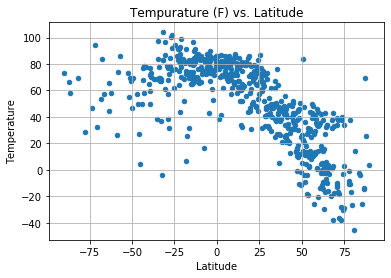

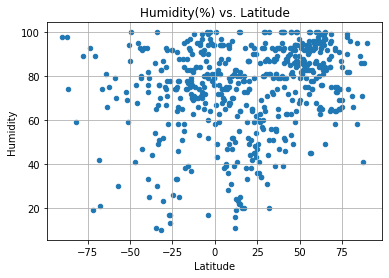

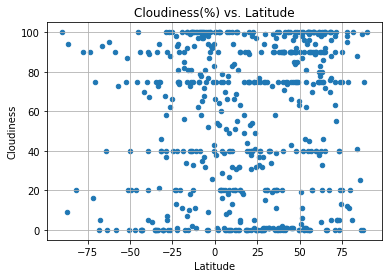

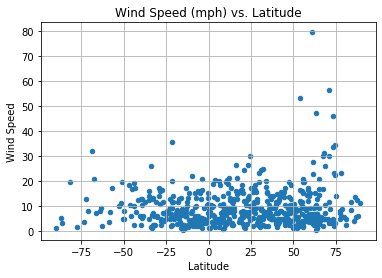

In [18]:
#plot latitude and temperature
df.plot(kind="scatter", x="Latitude", y="Temperature")
plt.title("Tempurature (F) vs. Latitude")
plt.grid(alpha=1)
plt.savefig("Images/temp_latitude.png")
plt.show()

#plot latitude and humidity
df.plot(kind="scatter", x="Latitude", y="Humidity")
plt.title("Humidity(%) vs. Latitude")
plt.grid(alpha=1)
plt.savefig("Images/humidity_latitude.png")
plt.show()

#plot Cloudiness and humidity
df.plot(kind="scatter", x="Latitude", y="Cloudiness")
plt.title("Cloudiness(%) vs. Latitude")
plt.grid(alpha=1)
plt.savefig("Images/cloudiness_latitude.png")
plt.show()

#plot Cloudiness and humidity
df.plot(kind="scatter", x="Latitude", y="Wind Speed")
plt.title("Wind Speed (mph) vs. Latitude")
plt.grid(alpha=1)
plt.savefig("Images/wind_latitude.png")
plt.show()

In [19]:
#Get sample response for reference

response=requests.get("http://api.openweathermap.org/data/2.5/weather?appid=6f4ceb243793f6a90aeed94e4f17b8a4&units=imperial&q=paris").json()
pprint(response)


{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 48.86, 'lon': 2.35},
 'dt': 1578462840,
 'id': 2988507,
 'main': {'feels_like': 45.57,
          'humidity': 87,
          'pressure': 1026,
          'temp': 52.3,
          'temp_max': 53.6,
          'temp_min': 51.01},
 'name': 'Paris',
 'sys': {'country': 'FR',
         'id': 6540,
         'sunrise': 1578469365,
         'sunset': 1578499853,
         'type': 1},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 220, 'speed': 11.41}}
